<a href="https://colab.research.google.com/github/PosgradoMNA/Proyecto-final-Equipo-135/blob/main/Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

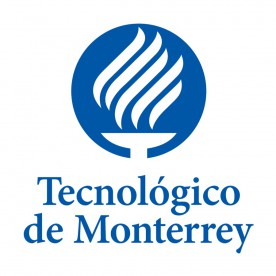

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Dr. María de la Paz Rico Fernández

<br>**Actividad : Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans **<br>

---
###Equipo 135
######Matrícula **A01793683** - *Emmanuel Domínguez*
######Matrícula **A01793546** - *José Ariel Corral León*
---


In [2]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.8 MB/s 


In [52]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 13.3 MB/s 
     |████████████████████████████████| 1.0 MB 39.5 MB/s 
     |████████████████████████████████| 1.7 MB 38.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 47.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=eafde91c4d02530a8cf3aaef5fc8f4469dee52c41b6cdb667fae913e4de878fb
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=199b951aa2183a4c05e579fd0da45b9a7072de3aa570316d3994a26d0e8e6764
  Stored in directory: /root/

In [85]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import patoolib as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from scipy.stats import alpha
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus 
from IPython.display import Image
import os
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import folium

In [4]:
#Bajar los datos: SouthGermanCredit.zip
!wget 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
pt.extract_archive('Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip')
#pt.extract_archive('Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip')

--2022-11-14 16:23:33--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip’

Datos_de_calidad_de 100%[===================>]   2.44M  1.59MB/s    in 1.5s    

2022-11-14 16:23:35 (1.59 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip’ saved [2556825/2556825]

patool: Extracting Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip ...
patool: running /usr/bin/7z x -o./Unpack_8uv10ha5 -- Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
patool: ... Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip extracted to `Datos_de_calidad_del_agua_2020'.


'Datos_de_calidad_del_agua_2020'

In [5]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'Datos_de_calidad_del_agua_2020', 'Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip', 'sample_data']


In [6]:
#Leer archivo de criterios

file = 'Datos_de_calidad_del_agua_2020/Escalas_superficial.csv'

df_ctr = pd.DataFrame(pd.read_csv(file, encoding= 'unicode_escape',names=['Calidad de agua', 'Criterio', 'Descripcion']))
df_ctr.head(50)

,Calidad de agua,Criterio,Descripcion
0,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
1,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
2,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
3,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
4,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
5,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION
6,Excelente,SST menor o igual a 25,"Clase de excepci¢n, muy buena calidad."
7,Buena calidad,SST mayor de 25 y menor o igual a 75,Aguas superficiales con bajo contenido de soli...
8,Aceptable,SST mayor de 75 y menor o igual a 150,Aguas superficiales con indicio de contaminaci...
9,Contaminada,SST mayor de 150 y menor o igual a 400,Aguas superficiales de mala calidad con descar...


In [7]:
from operator import index
#Vemos los criterios alineados con su 
df_ctr.groupby(['Criterio'], sort=False)['Calidad de agua'].value_counts() 

Criterio                                                               Calidad de agua                                   
CRITERIO                                                               CALIDAD DEL AGUA PARA COLI_FEC_superficiales          1
                                                                       CALIDAD DEL AGUA PARA DBO5                            1
                                                                       CALIDAD DEL AGUA PARA DQO                             1
                                                                       CALIDAD DEL AGUA PARA ENTEROCOCOS FECALES             1
                                                                       CALIDAD DEL AGUA PARA E_COLI                          1
                                                                       CALIDAD DEL AGUA PARA OXIGENO DISUELTO _porcentaje    1
                                                                       CALIDAD DEL AGUA PARA TOXICIDAD              

In [8]:
#Leer archivo de datos

file2 = 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

df = pd.DataFrame(pd.read_csv(file2, encoding= 'unicode_escape'))
df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [10]:
df.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [12]:
num_val = df.dtypes[df.dtypes != "object"].drop(['LONGITUD', 'LATITUD', 'PERIODO']).index
num_val


Index(['TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15'],
      dtype='object')

In [13]:
df[num_val].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TOX_D_48_FON_UT         0 non-null      float64
 1   CALIDAD_TOX_D_48_FON    0 non-null      float64
 2   TOX_FIS_FON_15_UT       0 non-null      float64
 3   CALIDAD_TOX_FIS_FON_15  0 non-null      float64
dtypes: float64(4)
memory usage: 129.5 KB


In [14]:
# Como ninguna de las columnas numéricas (excluyendo a Latitud y Longitud)
# tienen valores, las eliminamos del Data Frame
df.drop(columns=num_val, inplace=True) 

In [15]:
#Removemos los renglones que no tengan datos de latitud o longitud
df.dropna(axis=0, inplace=True, subset=['LONGITUD', 'LATITUD'])

In [16]:
df[['LONGITUD', 'LATITUD']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LONGITUD  3493 non-null   float64
 1   LATITUD   3493 non-null   float64
dtypes: float64(2)
memory usage: 81.9 KB


In [17]:
df.shape

(3493, 51)

In [18]:
cat_val = df.dtypes[df.dtypes == "object"].index
cat_val

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'DBO_mg/L',
       'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L', 'CALIDAD_SST',
       'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC', 'E_COLI_NMP_100mL',
       'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL', 'CALIDAD_ENTEROC', 'OD_PORC',
       'CALIDAD_OD_PORC', 'OD_PORC_SUP', 'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED',
       'CALIDAD_OD_PORC_MED', 'OD_PORC_FON', 'CALIDAD_OD_PORC_FON',
       'TOX_D_48_UT', 'CALIDAD_TOX_D_48', 'TOX_V_15_UT', 'CALIDAD_TOX_V_15',
       'TOX_D_48_SUP_UT', 'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT',
       'CALIDAD_TOX_FIS_SUP_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

In [19]:
df.isna().any()

CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [20]:

df[['SEMAFORO', 'CONTAMINANTES']]

,SEMAFORO,CONTAMINANTES
0,Rojo,"DQO,CF,"
1,Verde,NaN
2,Verde,NaN
3,Verde,NaN
4,Verde,NaN
...,...,...
3488,Amarillo,"CF,E_COLI,"
3489,Rojo,"DBO,DQO,CF,"
3490,Rojo,"DQO,"
3491,Amarillo,"CF,"


In [21]:
df[['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'GRUPO','PERIODO' ]].isna().value_counts()

CLAVE  SITIO  ORGANISMO_DE_CUENCA  ESTADO  MUNICIPIO  CUENCA  CUERPO DE AGUA  TIPO   SUBTIPO  GRUPO  PERIODO
False  False  False                False   False      False   False           False  False    False  False      3478
                                                              True            False  True     False  False        14
                                                      True    False           False  False    False  False         1
dtype: int64

In [22]:
#Reemplazamos el valor faltante para 'CUENCA' 

df['CUENCA'].fillna(value='RIO ACAPILCAN', inplace=True)
df[['CUENCA']].isna().any()

CUENCA    False
dtype: bool

In [23]:
df[['CUERPO DE AGUA','SUBTIPO']].isna().value_counts()

CUERPO DE AGUA  SUBTIPO
False           False      3479
True            True         14
dtype: int64

In [24]:
df[['CUENCA']].isna().value_counts()

CUENCA
False     3493
dtype: int64

In [25]:
df.loc[:, ('LONGITUD', 'LATITUD','SITIO')]

,LONGITUD,LATITUD,SITIO
0,-102.33911,22.24730,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA
1,-109.84290,22.90473,"LOS CABOS SEG 22, 2 ISA10B"
2,-109.86442,22.89880,"LOS CABOS SEG 22, 1 ISA10B"
3,-109.88604,22.89609,LOS CABOS 3
4,-109.89657,22.87694,LOS CABOS 1
...,...,...,...
3488,-99.42142,26.78971,RIO SALADO PUENTE CARRETERO
3489,-99.53064,27.43714,EL LAGUITO
3490,-99.50727,27.49901,PUENTE INTERNACIONAL I NUEVO LAREDO
3491,-99.52221,27.49631,RIO BRAVO FRENTE A COMAPA


In [26]:
df[cat_val].dtypes

CLAVE                     object
SITIO                     object
ORGANISMO_DE_CUENCA       object
ESTADO                    object
MUNICIPIO                 object
CUENCA                    object
CUERPO DE AGUA            object
TIPO                      object
SUBTIPO                   object
DBO_mg/L                  object
CALIDAD_DBO               object
DQO_mg/L                  object
CALIDAD_DQO               object
SST_mg/L                  object
CALIDAD_SST               object
COLI_FEC_NMP_100mL        object
CALIDAD_COLI_FEC          object
E_COLI_NMP_100mL          object
CALIDAD_E_COLI            object
ENTEROC_NMP_100mL         object
CALIDAD_ENTEROC           object
OD_PORC                   object
CALIDAD_OD_PORC           object
OD_PORC_SUP               object
CALIDAD_OD_PORC_SUP       object
OD_PORC_MED               object
CALIDAD_OD_PORC_MED       object
OD_PORC_FON               object
CALIDAD_OD_PORC_FON       object
TOX_D_48_UT               object
CALIDAD_TO

In [27]:
num_var = ['DQO_mg/L','SST_mg/L',
       'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL',
       'ENTEROC_NMP_100mL', 'OD_PORC',
       'OD_PORC_SUP', 'OD_PORC_MED',
        'OD_PORC_FON','TOX_D_48_UT', 'TOX_V_15_UT',
       'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']

In [28]:
type(df.loc[0]['DQO_mg/L'])

str

In [29]:
#for x in df[num_var]:
df.replace(to_replace={'<1': 0.5, '<2': 1,'<3': 1.5,'<10': 5}, inplace=True)
df[num_var]


,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,54.08,13.75,1162,98,NaN,NaN,46.8,NaN,NaN,NaN,NaN,0.5,0.5
1,NaN,5,NaN,NaN,20,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
2,NaN,5,NaN,NaN,1.5,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
3,NaN,13.9667,NaN,NaN,1.5,NaN,NaN,NaN,86.7,NaN,NaN,NaN,0.5
4,NaN,5,NaN,NaN,30,NaN,96.2,95.9,95.5,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,5,122,2400,2400,NaN,69.1,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3489,115.88,54,2400,4,NaN,NaN,91.6,NaN,NaN,NaN,NaN,0.5,0.5
3490,87.64,70,240,15,NaN,78.8,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3491,35.92,56,2400,11,NaN,76.2,NaN,NaN,NaN,0.5,0.5,NaN,NaN


In [30]:
cat_col = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'TIPO', 'GRUPO','PERIODO' ]


In [31]:
#Definimos X
X = df.drop(columns='SEMAFORO',axis=1)

#Definimos Y

y = df['SEMAFORO']

In [32]:
X[num_var]= X[num_var].astype(float)

In [33]:
X[num_var].dtypes

DQO_mg/L              float64
SST_mg/L              float64
COLI_FEC_NMP_100mL    float64
E_COLI_NMP_100mL      float64
ENTEROC_NMP_100mL     float64
OD_PORC               float64
OD_PORC_SUP           float64
OD_PORC_MED           float64
OD_PORC_FON           float64
TOX_D_48_UT           float64
TOX_V_15_UT           float64
TOX_D_48_SUP_UT       float64
TOX_FIS_SUP_15_UT     float64
dtype: object

In [34]:
#Sustituímos valores numéricos faltantes por la mediana

num_imp = SimpleImputer(strategy='median', missing_values = np.nan)
num_imp = num_imp.fit(X[num_var])
X[num_var] = num_imp.transform(X[num_var])

In [35]:
X[num_var].describe()

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,53.788020,100.799334,7.135836e+04,5.875626e+04,282.156656,67.391583,82.854881,72.267163,67.279072,0.544490,0.935532,0.515356,0.514363
std,130.112188,441.883028,1.005750e+06,9.045168e+05,2240.667815,22.958114,19.569612,9.972742,14.873979,0.509372,4.626526,0.422002,0.249498
min,5.000000,5.000000,1.500000e+00,1.500000e+00,1.500000,5.000000,5.000000,5.000000,5.000000,0.500000,0.500000,0.500000,0.500000
25%,16.740000,5.000000,8.550000e+02,9.000000e+01,1.500000,67.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
50%,27.010000,24.300000,2.400000e+03,4.240000e+02,1.500000,68.300000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
75%,42.620000,57.000000,1.100000e+04,2.400000e+03,1.500000,69.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
max,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


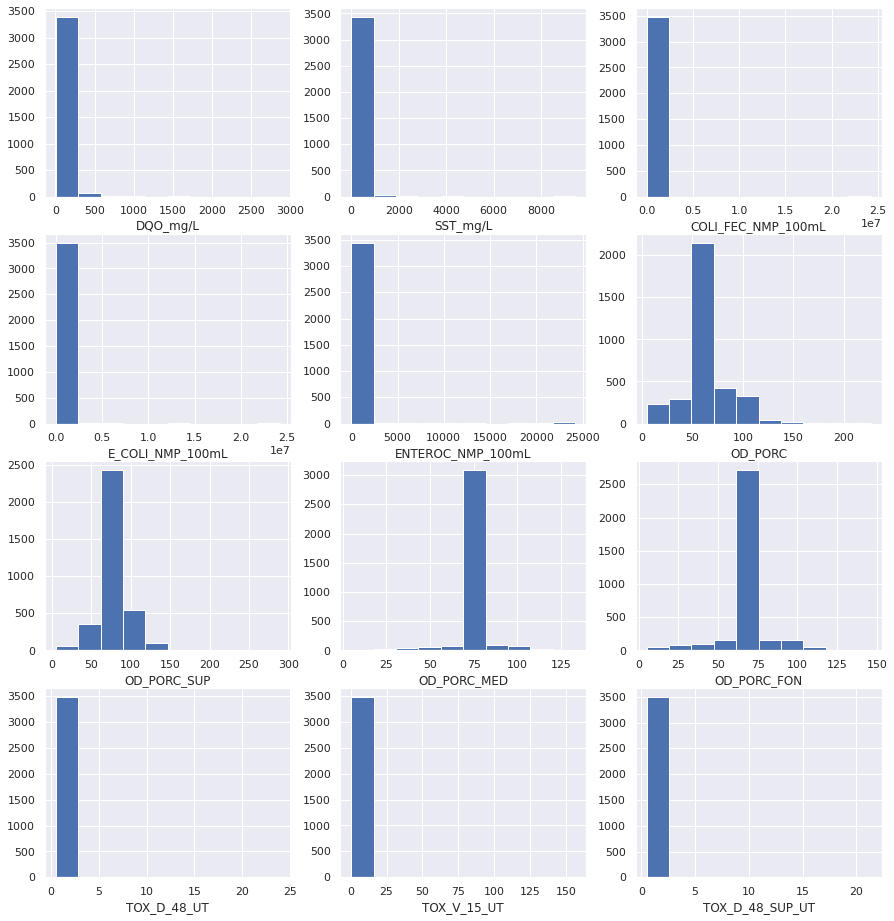

In [36]:
#Graficamos los histogramas de los valores numéricos sin transformar:

sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)    # Definimos una ventana de 5x4 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,12):
  plt.subplot(4,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(X[X[num_var].columns[k]], bins=10)     # X_train.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(X[num_var].columns[k])
plt.show()

In [37]:
X[num_var].isna().any()

DQO_mg/L              False
SST_mg/L              False
COLI_FEC_NMP_100mL    False
E_COLI_NMP_100mL      False
ENTEROC_NMP_100mL     False
OD_PORC               False
OD_PORC_SUP           False
OD_PORC_MED           False
OD_PORC_FON           False
TOX_D_48_UT           False
TOX_V_15_UT           False
TOX_D_48_SUP_UT       False
TOX_FIS_SUP_15_UT     False
dtype: bool

In [38]:
#x = range(len(X[num_var]))
#plt.xticks(x, labels=X[num_var].columns)
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.boxplot(X.loc[:10][num_var], labels=X[num_var].columns)
#plt.show()

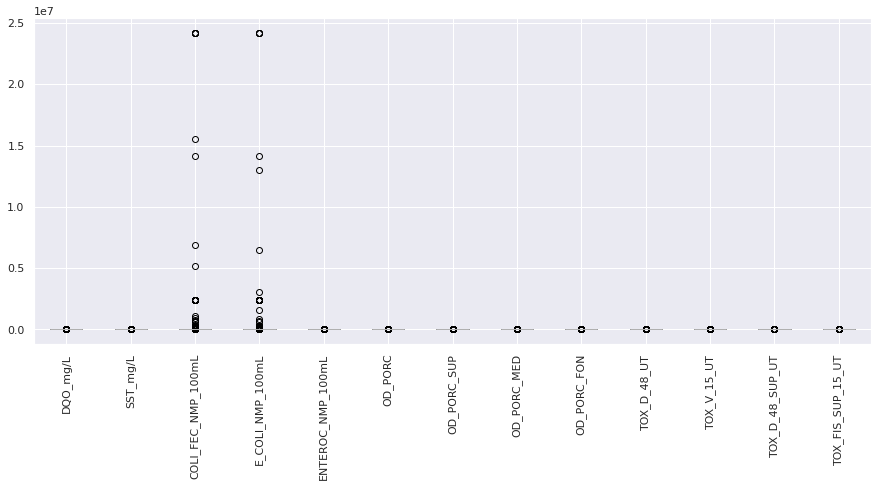

In [39]:
sns.set(rc={'figure.figsize':(15,6)})
X[num_var].boxplot(rot=90)

In [40]:
#Identificamos los outliers

Q1 = X[num_var].quantile(0.25)

Q3 = X[num_var].quantile(0.75)

IQR = Q3-Q1

BM = (X[num_var] > (Q3+1.5 *IQR)) | (X[num_var] < (Q1-1.5 *IQR))

#Vemos los valores de los outliers
X[num_var][BM]

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,NaN,NaN,NaN,NaN,NaN,NaN,46.8,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,20.0,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.7,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,30.0,NaN,96.2,95.9,95.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,115.88,NaN,NaN,NaN,NaN,NaN,91.6,NaN,NaN,NaN,NaN,NaN,NaN
3490,87.64,NaN,NaN,NaN,NaN,78.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3491,NaN,NaN,NaN,NaN,NaN,76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# pasamos los outliers al upper cap (Q3+IQR*1.5)

for att in num_var:

    Q3 = X[att].quantile(0.75)

    Q1 = X[att].quantile(0.25)

    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5

    upper_cap = Q3+IQR*1.5

    BM = X[att] < lower_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,att] = lower_cap

    BM = X[att] > upper_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,att] = upper_cap

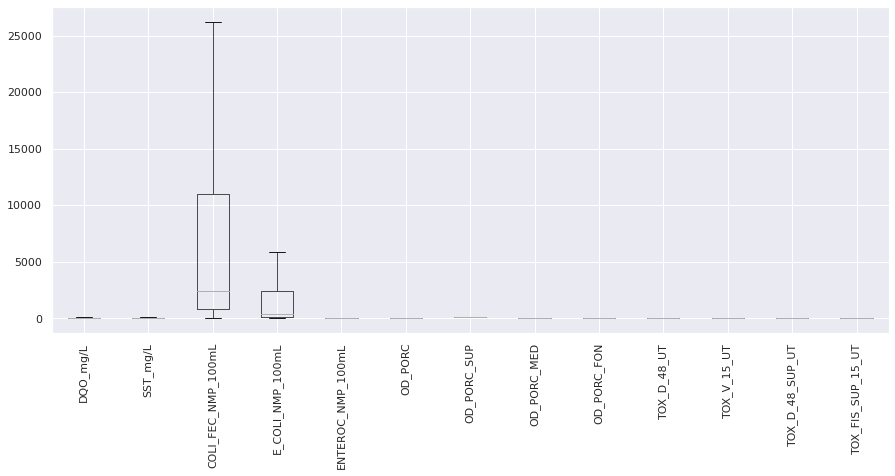

In [42]:
#Graficamos los resultados nuevamente

sns.set(rc={'figure.figsize':(15,6)})
X[num_var].boxplot(rot=90)

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
X[num_var] = scaler.fit_transform(X[num_var])

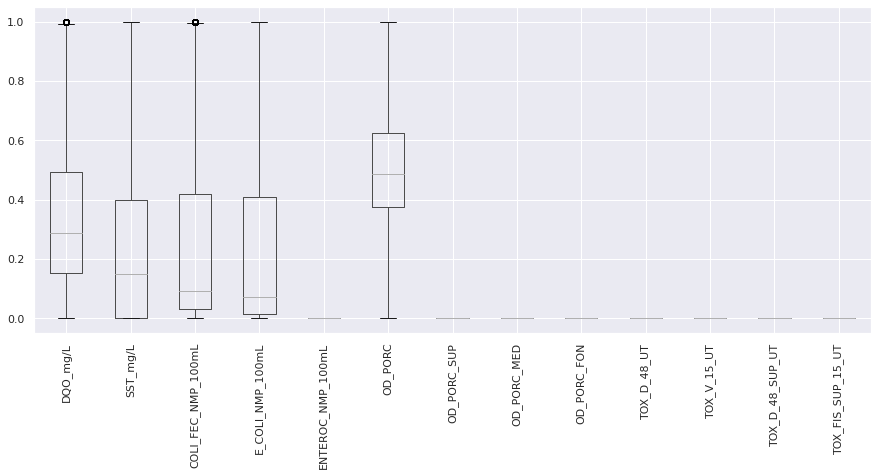

In [44]:
#Graficamos los resultados nuevamente después de normalizar los valores

sns.set(rc={'figure.figsize':(15,6)})
X[num_var].boxplot(rot=90)

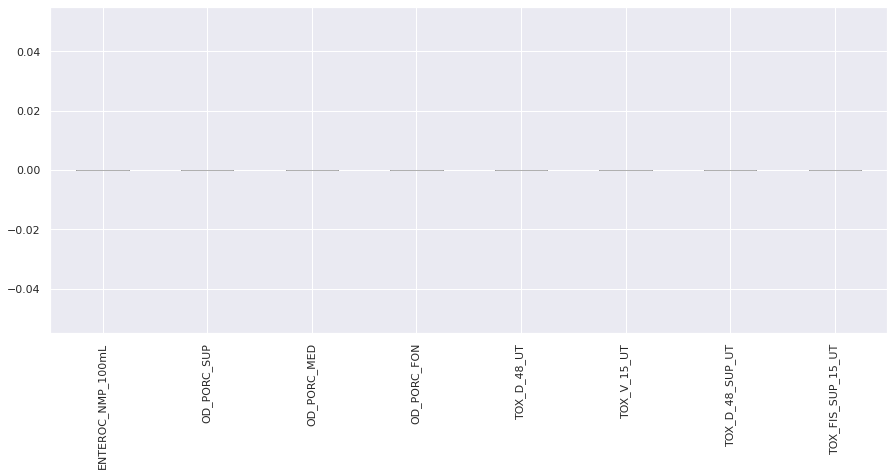

In [45]:
#Graficamos las variables con menor dispersión, vemos que prácticamente son valores constantes
sns.set(rc={'figure.figsize':(15,6)})
X[num_var].drop(columns=['DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL', 'OD_PORC']).boxplot(rot=90)

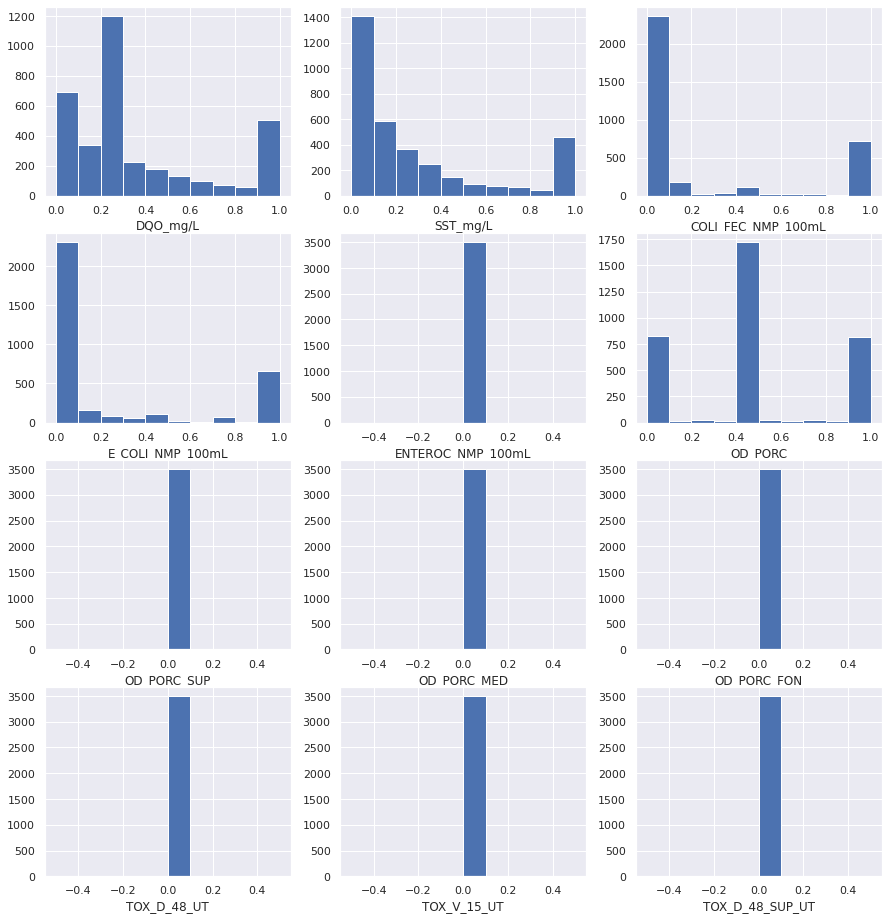

In [46]:
#Volvemos a correr las gráficas de dispersión, ahora sin outliers

sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)    # Definimos una ventana de 5x4 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,12):
  plt.subplot(4,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(X[X[num_var].columns[k]], bins=10)     # X_train.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(X[num_var].columns[k])
plt.show()

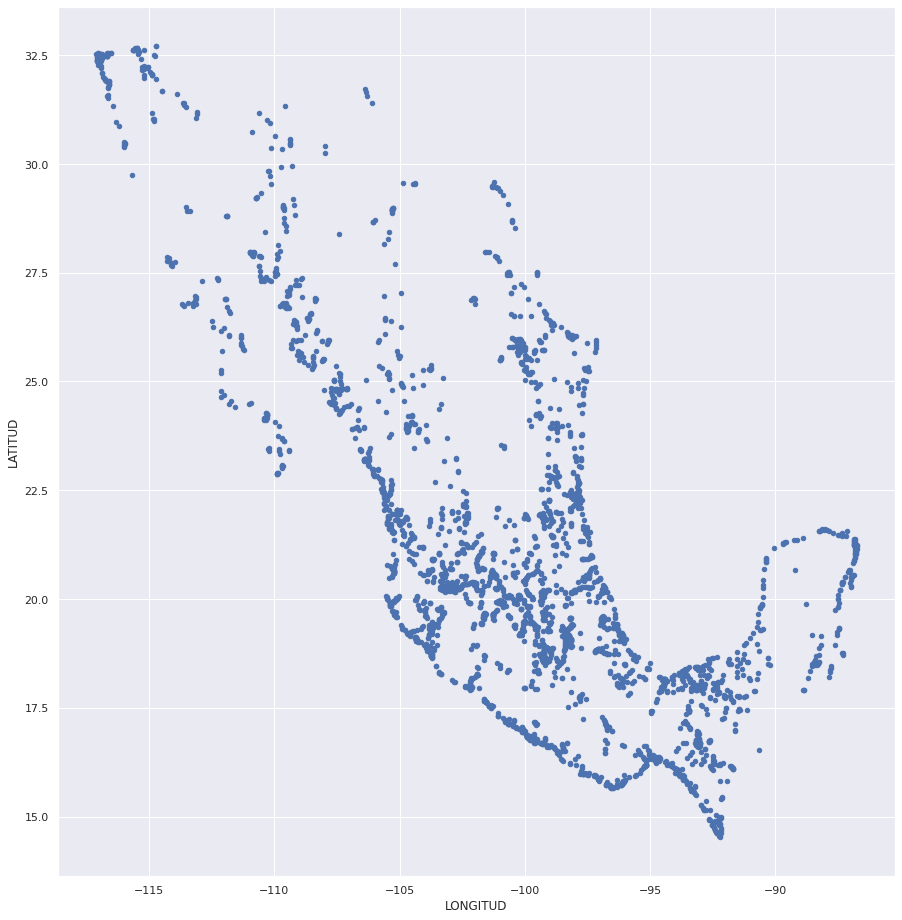

In [104]:
df.plot.scatter('LONGITUD','LATITUD')

In [106]:
df
df["location"] = list(zip(df.LONGITUD, df.LATITUD))
df["location"] = df["location"].apply(Point)
print(df.location)
df.head()

0        POINT (-102.33911 22.2473)
1        POINT (-109.8429 22.90473)
2        POINT (-109.86442 22.8988)
3       POINT (-109.88604 22.89609)
4       POINT (-109.89657 22.87694)
                   ...             
3488     POINT (-99.42142 26.78971)
3489     POINT (-99.53064 27.43714)
3490     POINT (-99.50727 27.49901)
3491     POINT (-99.52221 27.49631)
3492     POINT (-99.52572 27.51697)
Name: location, Length: 3493, dtype: object


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Location,location
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,NO,SI,NO,SI,ND,SI,SI,LENTICO,"(-102.33911, 22.2473)",POINT (-102.33911 22.2473)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,SI,ND,ND,SI,SI,SI,COSTERO,"(-109.8429, 22.90473)",POINT (-109.8429 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,SI,ND,ND,SI,SI,SI,COSTERO,"(-109.86442, 22.8988)",POINT (-109.86442 22.8988)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,SI,ND,ND,SI,SI,SI,COSTERO,"(-109.88604, 22.89609)",POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,SI,ND,ND,SI,SI,SI,COSTERO,"(-109.89657, 22.87694)",POINT (-109.89657 22.87694)


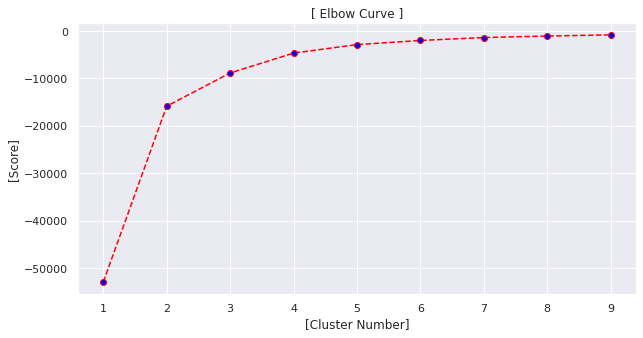

In [74]:
#Preparación para los Kmeans
Cluster_nums = range(1,10) 
kmeans = [KMeans(n_clusters=i) for i in Cluster_nums]
Y_axis = df[['LATITUD']]
X_axis = df[['LONGITUD']]
kmean_calc = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualizazicón de Kmeans
plt.figure(figsize=(10,5))
plt.plot(Cluster_nums, kmean_calc,color='red', linestyle='dashed', marker='o',
     markerfacecolor='blue')
plt.xlabel('[Cluster Number]')
plt.ylabel('[Score]')
plt.title('[ Elbow Curve ]')
plt.show()

In [93]:
X = df[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroid = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroid

,0,1,Coordinates
0,-101.052006,20.845694,POINT (-101.05201 20.84569)
1,-110.648349,27.695136,POINT (-110.64835 27.69514)
2,-93.471318,17.897901,POINT (-93.47132 17.89790)


In [94]:
df['SEMAFORO'].value_counts()

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64

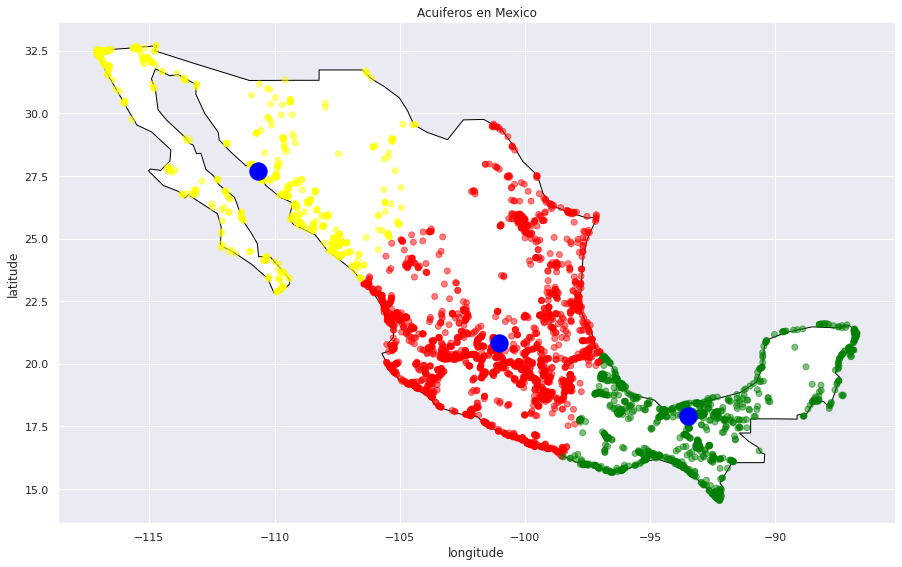

In [114]:
dot_map = gpd.GeoDataFrame(df.location, geometry="location")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
dot_map.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroid.plot(ax=gax, color='blue', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()